In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import spacy 

import sys; sys.path.insert(0, '../') #adds all the code we've written in src
from tqdm.notebook import trange, tqdm
from preprocessing import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv("../../cyberbullying_tweets/tweets_with_lang.csv", index_col = 0)
tweets = df.tweet_text
tweets = remove_ats(tweets)
tweets = remove_emoji(tweets)
tweets = remove_special(tweets)

df.head()

D:\capstone\src\notebooks\..\preprocessing.py:90: FutureWarning: The default value of regex will change from True to False in a future version.
  return text_arr.str.replace(at_regex, "")
D:\capstone\src\notebooks\..\preprocessing.py:97: FutureWarning: The default value of regex will change from True to False in a future version.
  return text_arr.str.replace(special_chars, "")


,tweet_text,cyberbullying_type,lang,score
0,"In other words #katandandre, your food was cra...",not_cyberbullying,en,0.999999
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,en,0.999994
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,en,0.999997
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,en,0.999996
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,en,0.999998


In [4]:
# !python -m spacy download en_core_web_sm
from spacy_langdetect import LanguageDetector
from spacy.language import Language

@Language.factory('language_detector')
def language_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load("en_core_web_sm", disable = ["tagger", "parser", "attribute_ruler", "ner"])
nlp.add_pipe('sentencizer')
nlp.add_pipe('language_detector', last=True) #2
spacy_tokenizer = nlp.tokenizer
docs = nlp.pipe(tweets)

In [6]:
lang = []
score = []

for doc in tqdm(docs, total=len(tweets)):
    lang.append(doc._.language["language"])
    score.append(doc._.language["score"])

  0%|          | 0/47692 [00:00<?, ?it/s]

In [9]:
df["lang"] = lang
df["score"] = score

In [11]:
df.to_csv("../../cyberbullying_tweets/tweets_with_lang.csv")

In [3]:
df_en = df[df.lang == 'en'].copy().reset_index(drop = True)
df_en

,tweet_text,cyberbullying_type,lang,score
0,"In other words #katandandre, your food was cra...",not_cyberbullying,en,0.999999
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,en,0.999994
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,en,0.999997
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,en,0.999996
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,en,0.999998
...,...,...,...,...
44615,"Black ppl aren't expected to do anything, depe...",ethnicity,en,0.999998
44616,Turner did not withhold his disappointment. Tu...,ethnicity,en,0.999995
44617,I swear to God. This dumb nigger bitch. I have...,ethnicity,en,0.999995
44618,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,en,0.857141


In [4]:
tweets = df_en.tweet_text
tweets = remove_ats(tweets)
tweets = remove_emoji(tweets)
tweets = remove_special(tweets)
tweets = to_lowercase(tweets)
tweets = expand_contractions(tweets)
#tweets = remove_stopwords(tweets)
tweets = stem_series(tweets)
# tweets = lemmatize_series(tweets)

D:\capstone\src\notebooks\..\preprocessing.py:90: FutureWarning: The default value of regex will change from True to False in a future version.
  return text_arr.str.replace(at_regex, "")
D:\capstone\src\notebooks\..\preprocessing.py:97: FutureWarning: The default value of regex will change from True to False in a future version.
  return text_arr.str.replace(special_chars, "")


In [5]:
cat_dict = {}
for i, type in enumerate(df.cyberbullying_type.unique()):
    cat_dict[type] = i 
    
df_en["y"] = df_en.cyberbullying_type.map(cat_dict)
df_en["X"] = tweets
df_en

,tweet_text,cyberbullying_type,lang,score,y,X
0,"In other words #katandandre, your food was cra...",not_cyberbullying,en,0.999999,0,in other word katandandr your food wa crapilic...
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,en,0.999994,0,whi is aussietv so white mkr theblock imaceleb...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,en,0.999997,0,a classi whore or more red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,en,0.999996,0,gio meh p thank for the head up but not too co...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,en,0.999998,0,thi is an isi account pretend to be a kurdish ...
...,...,...,...,...,...,...
44615,"Black ppl aren't expected to do anything, depe...",ethnicity,en,0.999998,5,black ppl are not expect to do anyth depend on...
44616,Turner did not withhold his disappointment. Tu...,ethnicity,en,0.999995,5,turner did not withhold hi disappoint turner c...
44617,I swear to God. This dumb nigger bitch. I have...,ethnicity,en,0.999995,5,i swear to god thi dumb nigger bitch i have go...
44618,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,en,0.857141,5,yea fuck you rt if you are a nigger fuck unfol...


In [7]:
df_en.groupby('cyberbullying_type').count()

,Unnamed: 0,tweet_text,lang,score,y,X
cyberbullying_type,,,,,,
age,7944,7944,7944,7944,7944,7944
ethnicity,7381,7381,7381,7381,7381,7381
gender,7643,7643,7643,7643,7643,7643
not_cyberbullying,6697,6697,6697,6697,6697,6697
other_cyberbullying,6979,6979,6979,6979,6979,6979
religion,7976,7976,7976,7976,7976,7976


In [17]:
spacy_tokenizer = nlp.tokenizer

[Hi, I, am, ayush]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tweets, df_en.y, test_size=0.2, random_state=42)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2))
vectorizer.fit(X_train)
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [8]:
print(X_train_bow.shape)
print(X_test_bow.shape)

(35696, 310983)
(8924, 310983)


In [9]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report 

log_reg = LR(max_iter=10000, solver = 'saga').fit(X_train_bow, y_train)
y_pred = log_reg.predict(X_test_bow)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.49      0.56      0.52      1237
           1       0.83      0.89      0.86      1417
           2       0.94      0.95      0.95      1573
           3       0.67      0.55      0.60      1664
           4       0.96      0.96      0.96      1536
           5       0.97      0.98      0.98      1497

    accuracy                           0.82      8924
   macro avg       0.81      0.82      0.81      8924
weighted avg       0.82      0.82      0.82      8924



In [11]:
from sklearn.feature_extraction.text import TfidfTransformer as tfidf
tf_vectorizer = tfidf()
tf_vectorizer.fit(X_train_bow)

X_train_tfidf = tf_vectorizer.transform(X_train_bow)
X_test_tfidf = tf_vectorizer.transform(X_test_bow)

In [12]:
log_reg_tfidf = LR(max_iter=10000, solver = 'saga').fit(X_train_tfidf, y_train)
y_pred_tfidf = log_reg_tfidf.predict(X_test_tfidf)
print(classification_report(y_pred_tfidf, y_test))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54      1196
           1       0.84      0.90      0.87      1413
           2       0.95      0.93      0.94      1615
           3       0.68      0.58      0.62      1597
           4       0.97      0.95      0.96      1579
           5       0.98      0.97      0.98      1524

    accuracy                           0.83      8924
   macro avg       0.82      0.82      0.82      8924
weighted avg       0.83      0.83      0.83      8924



In [15]:
from sklearn.decomposition import TruncatedSVD
reducer = TruncatedSVD(n_components=500).fit(X_train_tfidf)

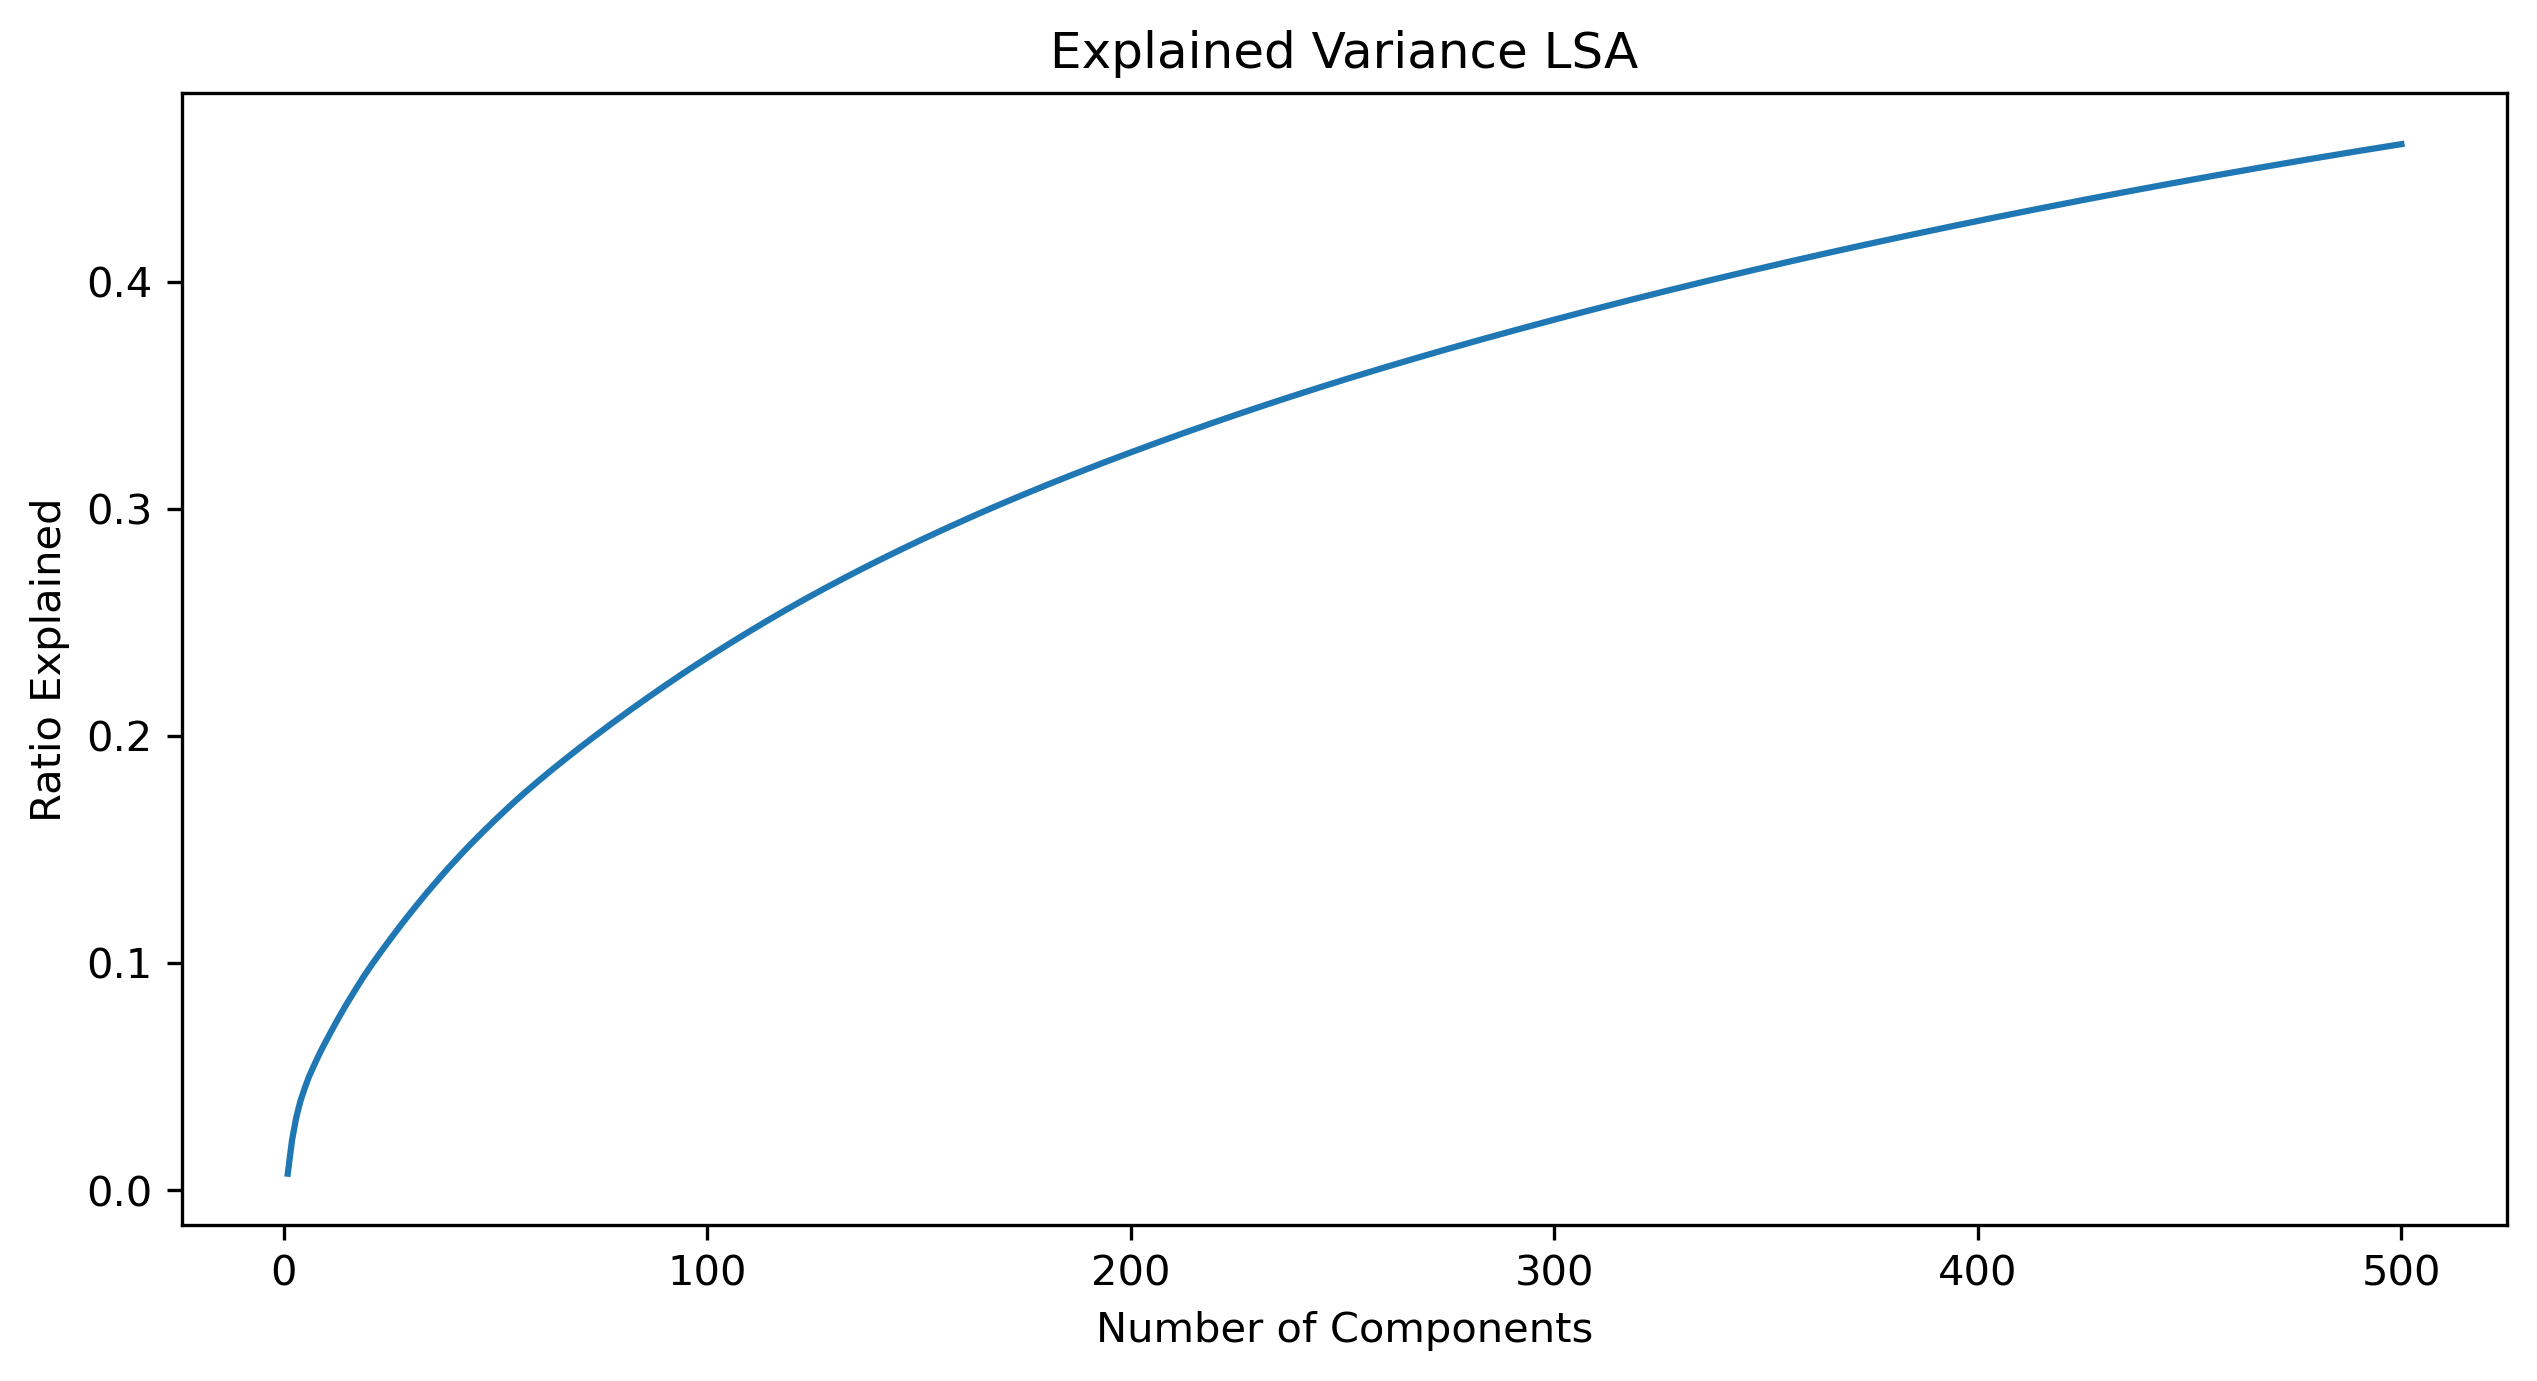

In [17]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.dpi"] = 300

x = np.arange(1, 501)
y = reducer.explained_variance_ratio_.cumsum()

plt.plot(x, y)
plt.title("Explained Variance LSA")
plt.ylabel("Ratio Explained")
plt.xlabel("Number of Components")
plt.show()

In [18]:
X_train_lsa = reducer.transform(X_train_tfidf)
X_test_lsa = reducer.transform(X_test_tfidf)

log_reg_lsa = LR(max_iter=10000, solver = 'saga').fit(X_train_lsa, y_train)
y_pred_lsa = log_reg_lsa.predict(X_test_lsa)

print(classification_report(y_pred_lsa, y_test))

              precision    recall  f1-score   support

           0       0.48      0.58      0.52      1150
           1       0.82      0.89      0.85      1411
           2       0.94      0.93      0.93      1603
           3       0.68      0.57      0.62      1647
           4       0.97      0.95      0.96      1582
           5       0.98      0.97      0.98      1531

    accuracy                           0.82      8924
   macro avg       0.81      0.81      0.81      8924
weighted avg       0.83      0.82      0.82      8924



In [20]:
import umap
embedding = umap.UMAP(n_components=2, metric='hellinger').fit(X_train_bow)
embedding.embedding_.shape


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\umap\umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 12224 edges.
It has only fully disconnected 541 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


(35689, 2)

## No Preprocessing LR

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_en.tweet_text, df_en.y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer(stop_words = 'english', ngram_range=(1,1))
vectorizer.fit(X_train)
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

log_reg = LR(max_iter=10000, solver = 'saga').fit(X_train_bow, y_train)
y_pred = log_reg.predict(X_test_bow)
print(classification_report(y_pred, y_test))

tf_vectorizer = tfidf()
tf_vectorizer.fit(X_train_bow)

X_train_tfidf = tf_vectorizer.transform(X_train_bow)
X_test_tfidf = tf_vectorizer.transform(X_test_bow)

log_reg_tfidf = LR(max_iter=10000, solver = 'saga').fit(X_train_tfidf, y_train)
y_pred_tfidf = log_reg_tfidf.predict(X_test_tfidf)

print(classification_report(y_pred_tfidf, y_test))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57      1288
           1       0.86      0.90      0.88      1445
           2       0.95      0.96      0.96      1562
           3       0.67      0.58      0.63      1573
           4       0.98      0.98      0.98      1543
           5       0.98      0.98      0.98      1513

    accuracy                           0.84      8924
   macro avg       0.83      0.83      0.83      8924
weighted avg       0.84      0.84      0.84      8924

              precision    recall  f1-score   support

           0       0.54      0.64      0.58      1182
           1       0.86      0.91      0.88      1429
           2       0.95      0.95      0.95      1587
           3       0.70      0.60      0.65      1606
           4       0.98      0.95      0.96      1591
           5       0.98      0.97      0.98      1529

    accuracy                           0.84      8924
   macro avg       0.83

In [20]:
X_train, X_test, y_train, y_test = train_test_split(tweets, df_en.y, test_size=0.2, random_state=42)
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,1))
vectorizer.fit(X_train)

X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

log_reg = LR(max_iter=10000, solver = 'saga').fit(X_train_bow, y_train)
y_pred = log_reg.predict(X_test_bow)
print(classification_report(y_pred, y_test))

tf_vectorizer = tfidf()
tf_vectorizer.fit(X_train_bow)

X_train_tfidf = tf_vectorizer.transform(X_train_bow)
X_test_tfidf = tf_vectorizer.transform(X_test_bow)

log_reg_tfidf = LR(max_iter=10000, solver = 'saga').fit(X_train_tfidf, y_train)
y_pred_tfidf = log_reg_tfidf.predict(X_test_tfidf)

print(classification_report(y_pred_tfidf, y_test))

              precision    recall  f1-score   support

           0       0.50      0.58      0.53      1205
           1       0.83      0.90      0.87      1403
           2       0.94      0.96      0.95      1562
           3       0.69      0.56      0.62      1696
           4       0.97      0.96      0.96      1553
           5       0.97      0.98      0.98      1505

    accuracy                           0.83      8924
   macro avg       0.82      0.82      0.82      8924
weighted avg       0.83      0.83      0.82      8924

              precision    recall  f1-score   support

           0       0.51      0.59      0.55      1201
           1       0.83      0.91      0.87      1382
           2       0.95      0.94      0.94      1602
           3       0.68      0.57      0.62      1639
           4       0.97      0.94      0.96      1582
           5       0.98      0.97      0.97      1518

    accuracy                           0.83      8924
   macro avg       0.82

In [12]:
from sklearn.preprocessing import MaxAbsScaler

X_train, X_test, y_train, y_test = train_test_split(tweets, df_en.y, test_size=0.2, random_state=42)
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,1))
vectorizer.fit(X_train)

X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

log_reg = LR(max_iter=10000, solver = 'saga').fit(X_train_bow, y_train)
y_pred = log_reg.predict(X_test_bow)
print(classification_report(y_pred, y_test))

tf_vectorizer = tfidf()
tf_vectorizer.fit(X_train_bow)

X_train_tfidf = tf_vectorizer.transform(X_train_bow)
X_test_tfidf = tf_vectorizer.transform(X_test_bow)

max_scaler = MaxAbsScaler()
max_scaler.fit(X_train_tfidf)
X_train_tfidf = max_scaler.transform(X_train_tfidf)
X_test_tfidf = max_scaler.transform(X_test_tfidf)

log_reg_tfidf = LR(max_iter=10000, solver = 'saga').fit(X_train_tfidf, y_train)
y_pred_tfidf = log_reg_tfidf.predict(X_test_tfidf)

print(classification_report(y_pred_tfidf, y_test))

              precision    recall  f1-score   support

           0       0.50      0.58      0.53      1205
           1       0.83      0.90      0.87      1403
           2       0.94      0.96      0.95      1562
           3       0.69      0.56      0.62      1697
           4       0.97      0.96      0.97      1552
           5       0.97      0.98      0.98      1505

    accuracy                           0.83      8924
   macro avg       0.82      0.82      0.82      8924
weighted avg       0.83      0.83      0.82      8924

              precision    recall  f1-score   support

           0       0.49      0.59      0.53      1171
           1       0.84      0.89      0.86      1428
           2       0.95      0.94      0.95      1597
           3       0.69      0.56      0.62      1661
           4       0.96      0.95      0.96      1561
           5       0.97      0.97      0.97      1506

    accuracy                           0.82      8924
   macro avg       0.82

In [ ]:
tweets = df_en.tweet_text()
transforms = [to_lowercase, remove_emoji, expand_contractions, remove]
### Figure out which preprocessing transforms should be added

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score as accuracy
import optuna

X_train, X_test, y_train, y_test = train_test_split(tweets, df_en.y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=7 )

X_train_bow = vectorizer.transform(X_train)
X_val_bow = vectorizer.transform(X_val)
X_test_bow = vectorizer.transform(X_test)

def objective(trial): 
    multi_class = trial.suggest_categorical("multi_class", ["auto", "ovr", "multinomial"])
    penalty = "l1"
    regularization_strength = trial.suggest_float("regularization_strength", 0 , 1)
    model = LR(max_iter = 10000, C = regularization_strength, penalty = penalty, 
               multi_class = multi_class, solver = 'saga', n_jobs=-1).fit(X_train_bow, y_train)
    
    y_pred = model.predict(X_val_bow)
    print(classification_report(y_pred, y_val))
    return accuracy(y_pred, y_val)

study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 10)
print(study.best_trial)

# svc = SVC().fit(X_train_tfidf, y_train)
# y_pred = svc.predict(X_test_tfidf)

# print(classification_report(y_pred, y_test))

[I 2022-04-03 19:32:16,260] A new study created in memory with name: no-name-33286353-38d8-4ec1-9ec4-4f50b35269db
[I 2022-04-03 19:33:13,825] Trial 0 finished with value: 0.8358523725834798 and parameters: {'multi_class': 'auto', 'regularization_strength': 0.16198900559220797}. Best is trial 0 with value: 0.8358523725834798.


              precision    recall  f1-score   support

           0       0.38      0.68      0.49       472
           1       0.82      0.91      0.86       843
           2       0.93      0.97      0.95       984
           3       0.86      0.56      0.68      1386
           4       0.97      0.96      0.97      1053
           5       0.97      0.98      0.98       952

    accuracy                           0.84      5690
   macro avg       0.82      0.84      0.82      5690
weighted avg       0.87      0.84      0.84      5690



[I 2022-04-03 19:34:31,794] Trial 1 finished with value: 0.8383128295254832 and parameters: {'multi_class': 'multinomial', 'regularization_strength': 0.193728445121496}. Best is trial 1 with value: 0.8383128295254832.


              precision    recall  f1-score   support

           0       0.40      0.67      0.50       502
           1       0.82      0.91      0.86       843
           2       0.93      0.97      0.95       983
           3       0.85      0.57      0.68      1364
           4       0.97      0.97      0.97      1047
           5       0.97      0.98      0.98       951

    accuracy                           0.84      5690
   macro avg       0.83      0.84      0.82      5690
weighted avg       0.86      0.84      0.84      5690



[I 2022-04-03 19:35:18,135] Trial 2 finished with value: 0.8237258347978911 and parameters: {'multi_class': 'multinomial', 'regularization_strength': 0.060804829101756885}. Best is trial 1 with value: 0.8383128295254832.


              precision    recall  f1-score   support

           0       0.30      0.70      0.42       359
           1       0.80      0.91      0.85       822
           2       0.92      0.97      0.94       971
           3       0.89      0.53      0.66      1525
           4       0.97      0.95      0.96      1063
           5       0.97      0.98      0.97       950

    accuracy                           0.82      5690
   macro avg       0.81      0.84      0.80      5690
weighted avg       0.87      0.82      0.83      5690



In [ ]:
print("hello")